In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from termcolor import colored #for colored text printing
warnings.filterwarnings('ignore')

## Loading dataset Iris

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['classes']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classes
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Initial informations about the dataset

In [5]:
#displaying first 7 rows
print('The first 7 rows of iris dataset:\n')
df.head(7)

The first 7 rows of iris dataset:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classes
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0


In [6]:
#checking if null values are there 
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
classes              0
dtype: int64

##### There is no null values in the dataset

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [8]:
# The shape of the dataset
print(df.shape)
num_rows,num_columns=df.shape
print(f'number of rows:{num_rows}')
print(f'number of columns:{num_columns}')

(150, 5)
number of rows:150
number of columns:5


In [9]:
#  Basic information from dataset like "Column names", "Data types" and "Non-null values counts"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   classes            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
# Descriptive analysis of dataset
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
classes,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


# <font color="#686868" size="8"> Data Exploration(EDA) 🔍</font>

Exploratory Data Analysis (EDA), is an essential step in the machine learning pipeline. It involves **examining** and **visualizing the characteristics of a dataset to gain insights**, **understand patterns**, **detect anomalies**, and **prepare the data for further analysis** and **modeling**. some common techniques used in data exploration:
- Data Visualization
- Data Cleaning
- Data Preprocessing

classes:

0:setosa
1:versicolor
2:virginica


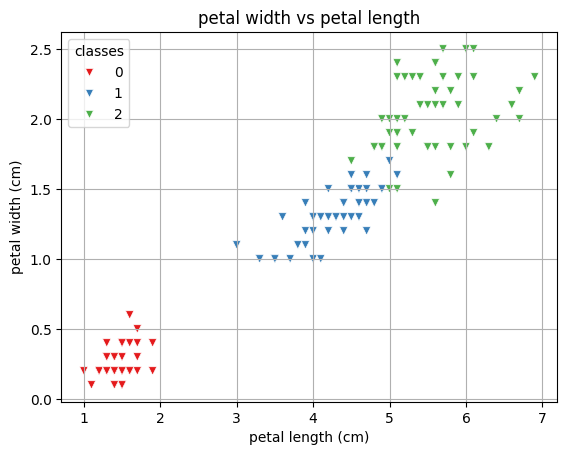

In [37]:
print('classes:\n')
print('0:setosa')
print('1:versicolor')
print('2:virginica')
sns.scatterplot(y='petal width (cm)',x='petal length (cm)',data=df,palette='Set1',hue='classes',marker='v')
plt.title('petal width vs petal length')
plt.grid()
plt.show()

#### Finding outliers

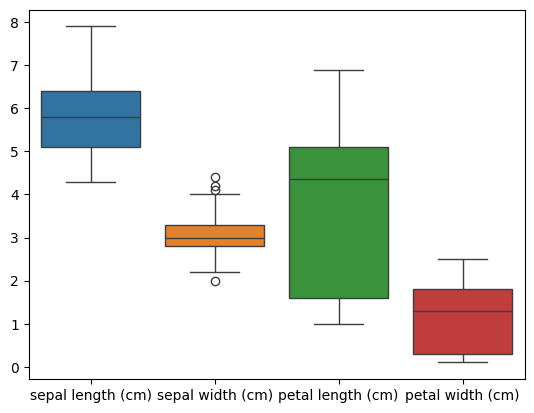

In [12]:
sns.boxplot(df.drop(columns=['classes']))
plt.show()

### <font color="#686868"> There is no major outliers in this dataset

## The correlation between the columns

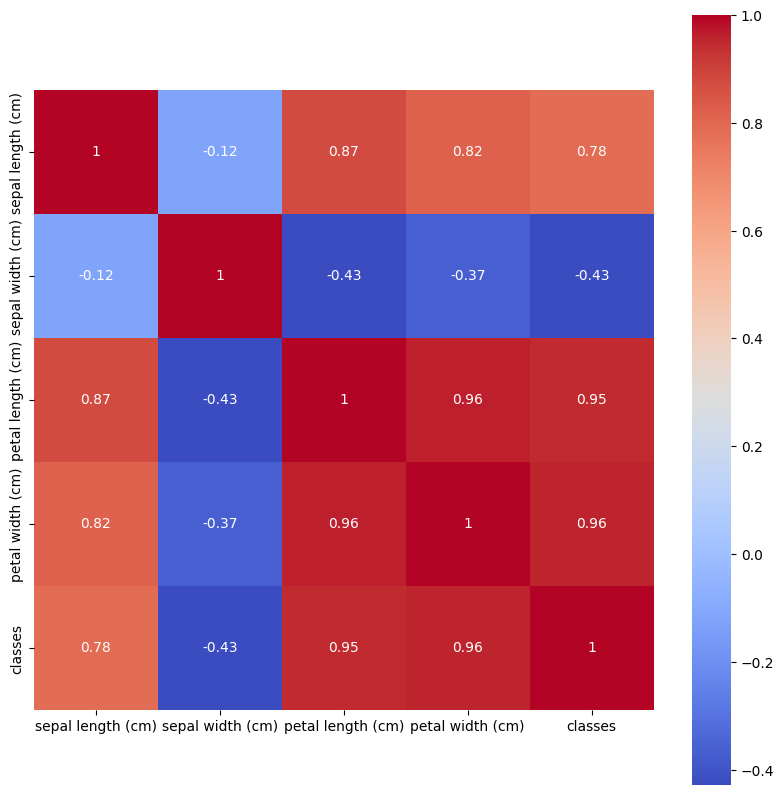

In [15]:
plt.figure(figsize=(10,10))
featureMeans = list(df.columns[0:5])

sns.heatmap(df[featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

# Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. 
This are two types:
##### **1:Agglomerative method**
##### **2:Divisive method**

## Linkage or distance matrix

Before any clustering is performed, it is required to determine the proximity matrix containing the distance between each point using a distance function. Then, the matrix is updated to display the distance between each cluster. The following three methods differ in how the distance between each cluster is measured.Types,
##### **1:Average Linkage**	
##### **2:Complete Linkage**
##### **3:Single Linkage**


## Dendograms

Dendograms are tree diagrams frequently used to illustrate the arrangement of the clusters produced by hierarchical clustering. The clades are arranged according to how similar (or dissimilar) they are. Clades that are close to the same height are similar to each other; clades with different heights are dissimilar — the greater the difference in height, the more dissimilarity. 

In [17]:
X = df.iloc[:,[2,3,4]].values
X

array([[1.4, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.3, 0.2, 0. ],
       [1.5, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.7, 0.4, 0. ],
       [1.4, 0.3, 0. ],
       [1.5, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.5, 0.1, 0. ],
       [1.5, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.4, 0.1, 0. ],
       [1.1, 0.1, 0. ],
       [1.2, 0.2, 0. ],
       [1.5, 0.4, 0. ],
       [1.3, 0.4, 0. ],
       [1.4, 0.3, 0. ],
       [1.7, 0.3, 0. ],
       [1.5, 0.3, 0. ],
       [1.7, 0.2, 0. ],
       [1.5, 0.4, 0. ],
       [1. , 0.2, 0. ],
       [1.7, 0.5, 0. ],
       [1.9, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.6, 0.4, 0. ],
       [1.5, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.5, 0.4, 0. ],
       [1.5, 0.1, 0. ],
       [1.4, 0.2, 0. ],
       [1.5, 0.2, 0. ],
       [1.2, 0.2, 0. ],
       [1.3, 0.2, 0. ],
       [1.4, 0.1, 0. ],
       [1.3, 0.2, 0. ],
       [1.5, 0.2, 0. ],
       [1.3, 0.3, 0. ],
       [1.3, 0.3

### Ward distance method
Let's use 'Ward' distance matrix for this dendogram.
$$d(u,v) = \sqrt{\frac{|v|+|s|}{T}d(v,s)^2+ \frac{|v|+|t|}{T}d(v,t)^2- \frac{|v|}{T}d(s,t)^2}$$

where **$u$** is the newly joined cluster consisting of clusters **$s$** and **$t$**, **$v$** is an unused cluster in the forest, **$T=|v|+|s|+|t|$**, and **$|*|$** is the cardinality of its argument. This is also known as the incremental algorithm.

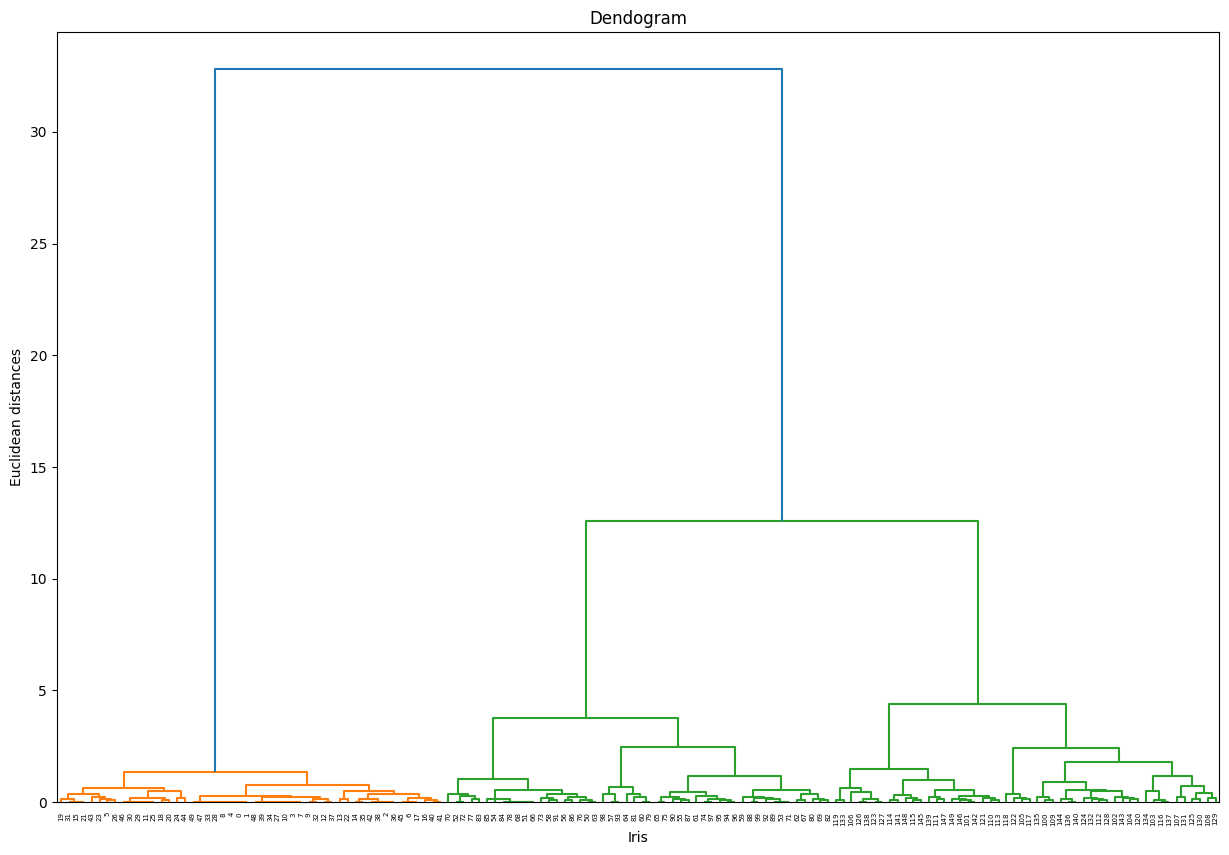

In [22]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
plt.title('Dendogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.show()

### Optimal number of clusters

Often, the optimal number of clusters can be found from a Dendogram is a simple manner.
* Look for the longest stretch of vertical line which is not crossed by any ***extended*** horizontal lines (here *extended* means horizontal lines i.e. the cluster dividers are extended infinitely to both directions).
* Now take any point on that stretch of line and draw an imaginary horizontal line.
* Count how many vertical lines this imaginary lines crossed.
* That is likely to be the optimal number of clusters.

**The idea is shown in the following figure. Here the optimal number of clusters could be 5.**

##### Building the model

In [30]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc=hc.fit_predict(X)

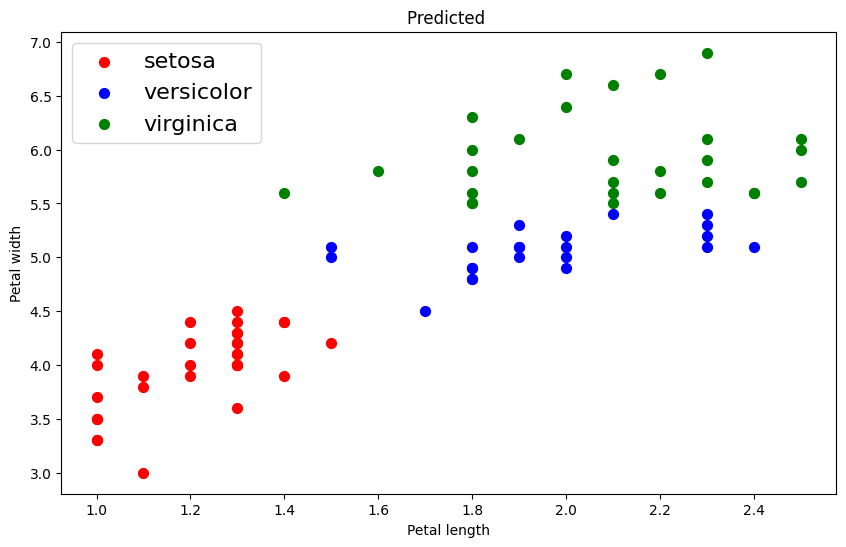

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(X[y_hc == 0, 1], X[y_hc == 0, 0], s = 50, c = 'red', label = 'setosa')
plt.scatter(X[y_hc == 1, 1], X[y_hc == 1, 0], s = 50, c = 'blue', label = 'versicolor')
plt.scatter(X[y_hc == 2, 1], X[y_hc == 2, 0], s = 50, c = 'green', label = 'virginica')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Predicted ')
plt.legend(fontsize=16)
plt.show()

### K-Means Clustering

## Verifying the optimal number of clusters by k-means algorithm

Given a set of observations $(x_1, x_2, …, x_n)$, where each observation is a d-dimensional real vector, [**k-means clustering**](https://en.wikipedia.org/wiki/K-means_clustering) aims to partition the *$n$* observations into *$k$* (≤ *$n$*) sets $S = {S_1, S_2, …, S_k}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:

$${\displaystyle {\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}={\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}}$$

where $\mu_i$ is the mean of points in $S_i$

We run k-means++ model (k-means with carefully initialized centroids) iterating over number of clusters (1 to 15) and plot the ***within-cluster-sum-of-squares (WCSS) matric*** to determine the optimum number of cluster by elbow method

In this code, the **Elbow method** is being implemented to help determine the optimal number of clusters for the K-Means algorithm.

### Explanation:

1. **WSS (Within-Cluster Sum of Squares)**: This refers to the sum of squared distances between each data point and the centroid of its assigned cluster. The lower the WSS, the more tightly grouped the data points are within their clusters.

2. **Loop (1 to 10 clusters)**: The loop iterates from 1 to 10, fitting the K-Means algorithm to the data for different numbers of clusters (from 1 cluster to 9 clusters).

3. **KMeans Model**: For each iteration, a K-Means model is created with `i` clusters and trained on the data (`df`).

4. **Inertia (WSS value)**: The WSS (inertia) value for each model is calculated and stored in the `wss` list. The inertia represents how internally cohesive the clusters are.

5. **Plot**: After collecting WSS values, a plot is created showing the number of clusters on the x-axis and the WSS (inertia) on the y-axis.

### Elbow Method:
The "Elbow" method helps identify the optimal number of clusters by looking for a point where the WSS stops decreasing significantly (forming an elbow shape). This is the point where adding more clusters does not result in a significant reduction in WSS, indicating the best trade-off between model complexity and accuracy.


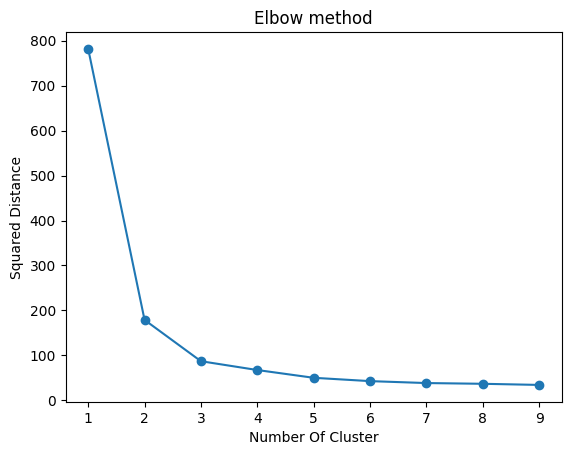

In [53]:
wss=[]
for i in range (1,10):
    kmean=KMeans(n_clusters=i,random_state=42)
    kmean.fit(df)
    wss.append(kmean.inertia_)
plt.plot(range(1,10),wss,marker='o')
plt.title("Elbow method")
plt.xlabel('Number Of Cluster')
plt.ylabel("Squared Distance")
plt.show()

### Applying Silhouette Score

This code is using the **Silhouette Score** to evaluate the performance of the K-Means clustering algorithm for different numbers of clusters. Let's break it down step by step:

### Code Explanation:

1. **Loop through different cluster counts**:
   - The `for` loop iterates from `2` to `9`, where each iteration represents a different number of clusters (`n_clusters=i`) to try for the K-Means algorithm.

2. **K-Means Model**:
   - Inside the loop, the K-Means algorithm is initialized with `i` clusters and a maximum of 100 iterations (`max_iter=100`) for convergence.
   - The `fit()` method is applied to the dataset `df`, which means that K-Means will attempt to find `i` clusters by partitioning the data.

3. **Silhouette Score**:
   - After fitting the model, the **Silhouette Score** is computed using `silhouette_score(df, kmeans.labels_)`. The Silhouette Score measures how similar an object is to its own cluster compared to other clusters:
     - A **high Silhouette Score** (close to 1) indicates that the data points are well clustered.
     - A **low score** (close to -1) indicates that the points may be assigned to the wrong cluster.
     - A **score near 0** means that the points lie on the border between clusters.

4. **Print Results**:
   - The `print()` statement outputs the current iteration number (`i`) and the corresponding Silhouette Score. The `format(i, score)` part inserts the iteration number and score into the string.

### Silhouette Score:

The **Silhouette Score** evaluates both cohesion and separation:
- **Cohesion**: Measures how close the data points in a cluster are to one another.
- **Separation**: Measures how far away the clusters are from each other.

By testing different values of `i` (number of clusters), you can use the Silhouette Score to assess which number of clusters provides the beimal clustering structure for your data.
    

In [55]:
from sklearn.metrics import silhouette_score
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,max_iter=100)
    kmeans.fit(df)
    score=silhouette_score(df,kmeans.labels_)
    print("the iter number {} has score{}".format(i,score))
    

the iter number 2 has score0.676348777683869
the iter number 3 has score0.5791983481276921
the iter number 4 has score0.5209848037076111
the iter number 5 has score0.3723955479133791
the iter number 6 has score0.4751085139748166
the iter number 7 has score0.37898862557987106
the iter number 8 has score0.467678885213132
the iter number 9 has score0.33806210649693874


In [46]:
from sklearn.cluster import KMeans

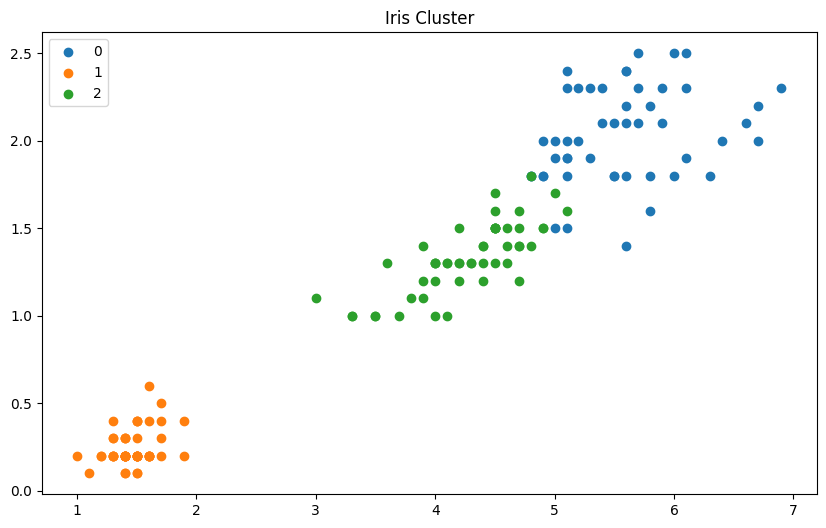

In [56]:
kmeans=KMeans(n_clusters=3,random_state=42)
y= kmeans.fit_predict(X)
unique_label=np.unique(y)
plt.figure(figsize=(10,6))
for i in unique_label:
    plt.scatter(X[y==i,0],X[y==i,1],label=i)
plt.legend()
plt.title("Iris Cluster")
plt.show()